In [1]:
#importing
import numpy as np
import pandas as pd
import multiprocessing
import math 
import xgboost as xgb
from numpy import mean
from statistics import variance
from numpy import std
from pandas import read_csv
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
from matplotlib import pyplot as plt 

In [2]:
#warnings.filterwarnings('ignore')

In [3]:
multiprocessing.cpu_count()

8

In [4]:
data_wd = "C:/Users/Lenovo/Desktop/git/STAT4011_Project1/data/Lianjia_transformed.csv"
df = pd.read_csv(data_wd)

In [5]:
X = df.drop(columns=['log_price'])
y = df['log_price']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=4011)

# Define a model Assess Function

In [6]:
def model_assess(tuned_model,X_train,y_train,X_test,y_test):
    y_train_pred=tuned_model.predict(X_train)
    y_test_pred=tuned_model.predict(X_test)
    train_R2 = tuned_model.score(X_train, y_train)
    test_R2 = tuned_model.score(X_test, y_test)
    train_RMSE=round(math.sqrt(mean_squared_error(y_train_pred,y_train)),4)
    test_RMSE=round(math.sqrt(mean_squared_error(y_test_pred,y_test)),4)
    train_MAE=round(mae(y_train_pred,ytrain),4)
    test_MAE=round(mae(y_test_pred,ytest),4)
    return([train_R2,test_R2,train_RMSE,test_RMSE,train_MAE,test_MAE])

# OLS

In [7]:
model_ols = LinearRegression().fit(Xtrain, ytrain)

In [8]:
ols_result=model_assess(model_ols,Xtrain,ytrain,Xtest,ytest)
ols_result

[0.8515848973043461, 0.8450110488717427, 0.2476, 0.2557, 0.1886, 0.1948]

# LASSO

In [19]:
# step 1: examine the model
model_lasso = LassoCV(cv=5, random_state=4011,n_jobs=-1,alphas=np.logspace(-6,-2,100),tol=1e-2).fit(Xtrain, ytrain)

D:\anoconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.66933355171693, tolerance: 56.194184499224434
  model = cd_fast.enet_coordinate_descent_gram(
D:\anoconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.9156282179058, tolerance: 56.194184499224434
  model = cd_fast.enet_coordinate_descent_gram(
D:\anoconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.30889008953238, tolerance: 56.194184499224434
  model = cd_fast.enet_coordinate_descent_gram(
D:\anoconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You

In [20]:
# step 2: examine if the selected hyperparameter lies within boundary
model_lasso.alpha_ 

8.697490026177834e-05

In [22]:
# step 3: model assessment
lasso_result=model_assess(model_lasso,Xtrain,ytrain,Xtest,ytest)
lasso_result

[0.8515496590410763, 0.845461681579183, 0.2476, 0.2554, 0.1886, 0.1946]

In [23]:
# step 4: examine if coefficients are shrinked towards 0; this is only for lasso and ridge
print(list(zip(model_lasso.coef_, X))) 

[(0.05538488221552098, 'total_floor'), (0.19784543427314297, 'area_size'), (0.06789003605170016, 'elevator'), (-0.004068966423095404, 'date_on_market'), (0.016878724161455576, 'last_transact_date'), (0.13176155022012445, 'bedrm_no'), (0.07905246048693856, 'parlour_no'), (-0.002574858887588115, 'kitchen_no'), (0.016279836217348034, 'toilet_no'), (-0.02613347145478699, 'stair'), (-0.042332652051492815, 'unit'), (0.049273451586230727, 'proportion'), (0.00821732447318167, 'mid_floor'), (-0.010174311626758286, 'higher_floor'), (-0.0053926815354830805, 'duplex_config'), (0.015251690042437451, 'levelling_config'), (0.006069259565467733, 'split_level_config'), (-0.0032505010221855735, 'diepin'), (-0.028528268303208183, 'talou'), (0.001827174144784119, 'pingfang'), (0.002427627621082817, 'bantajiehe'), (0.0, 'banlou'), (-0.0032846031928113906, 'dudong'), (-0.0054430528459324225, 'lianpai'), (0.03436235534476601, 'south'), (0.007386113533724957, 'west'), (-0.0009623971759129498, 'north'), (0.002

# RIDGE

In [24]:
model_ridge = RidgeCV(cv=5,alphas=np.logspace(-1,3,100)).fit(Xtrain, ytrain)
model_ridge.alpha_ 

13.848863713938732

In [25]:
ridge_result=model_assess(model_ridge,Xtrain,ytrain,Xtest,ytest)
ridge_result

[0.8515641106189493, 0.8453860346805724, 0.2476, 0.2554, 0.1886, 0.1946]

In [26]:
#examine if coefficients are shrinked 
print(list(zip(model_ridge.coef_, X))) 

[(0.05560010679962209, 'total_floor'), (0.19745691966038373, 'area_size'), (0.06808280045903752, 'elevator'), (-0.00415414503660781, 'date_on_market'), (0.016969308770858137, 'last_transact_date'), (0.13178890993096612, 'bedrm_no'), (0.07908026122138863, 'parlour_no'), (-0.0026650381445148977, 'kitchen_no'), (0.016538445511905208, 'toilet_no'), (-0.026520186065110786, 'stair'), (-0.04234774593683582, 'unit'), (0.04949553610158656, 'proportion'), (0.00825837735676061, 'mid_floor'), (-0.010223838055979904, 'higher_floor'), (-0.005346781258118472, 'duplex_config'), (0.015431795276353244, 'levelling_config'), (0.006183454357011369, 'split_level_config'), (-0.0025641145197406005, 'diepin'), (-0.009080292875956427, 'talou'), (0.0037769251937985445, 'pingfang'), (0.011035087086888233, 'bantajiehe'), (0.021083235414099514, 'banlou'), (-0.0023795862667939263, 'dudong'), (-0.004371977954584201, 'lianpai'), (0.03459380408854662, 'south'), (0.007555174528033008, 'west'), (-0.0010059295783471716, '

# Elastic Net

In [35]:
model_elanet = ElasticNetCV(cv=5,l1_ratio=[0.5,0.7,0.8,0.9,0.95,1],alphas=np.logspace(-20,0,20),n_jobs=-1,tol=1e-1,max_iter=1e5).fit(Xtrain, ytrain)

In [36]:
model_elanet.alpha_

1e-20

In [37]:
model_elanet.l1_ratio_ 

0.7

In [39]:
elanet_result=model_assess(model_elanet,Xtrain,ytrain,Xtest,ytest)
elanet_result

[0.8453872950500356, 0.8364816350999308, 0.2527, 0.2627, 0.1891, 0.1962]

# KNN Regression

In [40]:
param_grid_knr = {'n_neighbors': [1,2,3,4], }

select_model_knr = GridSearchCV(KNeighborsRegressor(),param_grid_knr, n_jobs=-1, cv=5, 
                                scoring='neg_mean_squared_error', return_train_score=True)
select_model_knr.fit(Xtrain, ytrain)
model_knr = select_model_knr.best_estimator_
select_model_knr.best_params_

D:\anoconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.1352965        nan        nan        nan        nan        nan
        nan        nan]
  warnings.warn(
D:\anoconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


{'n_neighbors': 1, 'weights': 'uniform'}

In [42]:
knr_result = model_assess(model_knr, Xtrain,ytrain,Xtest,ytest)
knr_result

[1.0, 0.6776991772158203, 0.0, 0.3688, 0.0, 0.2722]

# SVR

In [43]:
param_grid_svr = [
    {'kernel': ["linear","poly","rbf","sigmoid"]}]

select_model_svr = GridSearchCV(SVR(),param_grid_svr, n_jobs=-1, cv=5,scoring='neg_mean_squared_error',
return_train_score=True)
select_model_svr.fit(Xtrain, ytrain)

model_svr = select_model_svr.best_estimator_
select_model_svr.best_params_

{'kernel': 'rbf'}

In [44]:
svr_result= model_assess(model_svr,Xtrain,ytrain,Xtest,ytest)
svr_result 

[0.9429281219792197, 0.8887957510582891, 0.1535, 0.2166, 0.1134, 0.1541]

# Decision Tree

In [49]:
param_grid_tree = {'max_depth':[25,30,35,40],'max_features': [60,70,80,90],'max_leaf_nodes': [350,400,450,500],
                   'min_samples_leaf': [3,4,5,6],'min_samples_split': [1,2,3,4]}

tree = DecisionTreeRegressor(random_state=4011)
select_model_tree = GridSearchCV(tree, param_grid_tree, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_tree_reg = select_model_tree.best_estimator_
select_model_tree.best_params_

D:\anoconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan -0.05342095 -0.05342095 ...         nan         nan
         nan]
  warnings.warn(
D:\anoconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [        nan -0.03554349 -0.03554349 ...         nan         nan
         nan]
  warnings.warn(


{'max_depth': 30,
 'max_features': 70,
 'max_leaf_nodes': 450,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [50]:
tree_reg_result = model_assess(model_tree_reg,Xtrain,ytrain,Xtest,ytest)
tree_reg_result

[0.9205641456691595, 0.8740980093213135, 0.1811, 0.2305, 0.137, 0.1679]

# Random Forest

In [71]:
param_grid_rfr = {'max_features': [10,20,30,40],'n_estimators': [96,100,104,108]}

forest_reg = RandomForestRegressor(random_state=4011,max_depth=30)
select_model_rfr = GridSearchCV(forest_reg, param_grid_rfr, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_rfr = select_model_rfr.best_estimator_
select_model_rfr.best_params_

{'max_features': 30, 'n_estimators': 104}

In [72]:
rfr_result = model_assess(model_rfr,Xtrain,ytrain,Xtest,ytest)
rfr_result

[0.9892311806787124, 0.9172077472794686, 0.0667, 0.1869, 0.0485, 0.1344]

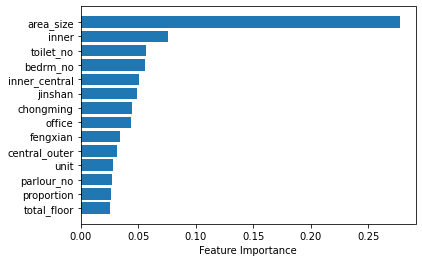

In [73]:
sort = model_rfr.feature_importances_.argsort()
feature_importance_sorted = model_rfr.feature_importances_[sort]
feature_sorted = X.columns[sort]
plt.barh(feature_sorted[60:74], feature_importance_sorted[60:74])
plt.xlabel("Feature Importance")
plt.savefig("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/figures/rfr.jpg")

# Tree with AdaBoost

In [98]:
param_grid_ada = [
    {'learning_rate': np.logspace(-1,1,10),'n_estimators': [220,230,240,250]}
]

In [99]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30),random_state=4011)

select_model_ada = GridSearchCV(ada_reg, param_grid_ada, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_ada = select_model_ada.best_estimator_
select_model_ada.best_params_

{'learning_rate': 1.291549665014884, 'n_estimators': 230}

In [102]:
ada_result = model_assess(model_ada,Xtrain,ytrain,Xtest,ytest)
ada_result

[0.9997645263617043, 0.9189074718069157, 0.0099, 0.185, 0.0028, 0.1271]

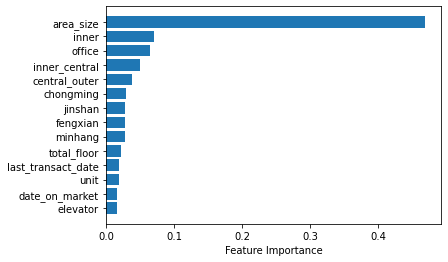

In [103]:
sort = model_ada.feature_importances_.argsort()
feature_importance_sorted = model_ada.feature_importances_[sort]
feature_sorted = X.columns[sort]
plt.barh(feature_sorted[60:74], feature_importance_sorted[60:74])
plt.xlabel("Feature Importance")
plt.savefig("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/figures/ada.jpg")

# Tree with Gradient boosting

In [115]:
param_grid_gb = [
    {'learning_rate':np.logspace(-2,0,10),'n_estimators':[150,160,170,180]}
]

In [116]:
GB_reg=GradientBoostingRegressor(max_depth=30)

select_model_GB = GridSearchCV(GB_reg, param_grid_gb, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_GB = select_model_GB.best_estimator_
select_model_GB.best_params_

{'learning_rate': 0.016681005372000592, 'n_estimators': 160}

In [117]:
ada_result = model_assess(model_ada,Xtrain,ytrain,Xtest,ytest)
ada_result

[0.9997645263617043, 0.9189074718069157, 0.0099, 0.185, 0.0028, 0.1271]

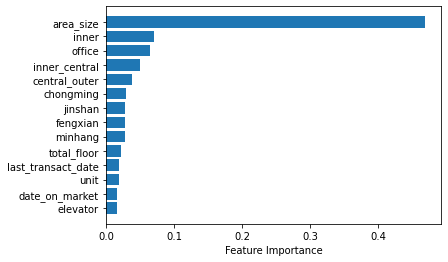

In [118]:
sort = model_ada.feature_importances_.argsort()
feature_importance_sorted = model_ada.feature_importances_[sort]
feature_sorted = X.columns[sort]
plt.barh(feature_sorted[60:74], feature_importance_sorted[60:74])
plt.xlabel("Feature Importance")
plt.savefig("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/figures/GB.jpg")

# Tree with XGB boosting

In [121]:
param_grid_xgb = [
    {'learning_rate': np.logspace(-2,0,10),'gamma': np.logspace(-5,0,5),
                'n_estimators': [140,150,160,170]}
]

In [122]:
XGB_reg=xgb.XGBRegressor(objective="reg:squarederror",max_depth=30,booster="gbtree",)

select_model_XGB = GridSearchCV(XGB_reg, param_grid_xgb, n_jobs=-1, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True).fit(Xtrain, ytrain)

model_XGB = select_model_XGB.best_estimator_
select_model_XGB.best_params_

KeyboardInterrupt: 

In [ ]:
XGB_result = model_assess(model_XGB,Xtrain,ytrain,Xtest,ytest)
XGB_result

# Save All Results

In [ ]:
all_results=np.vstack([ols_result,lasso_result,ridge_result,elanet_result,knr_result,svr_result,
                      tree_reg_result,rfr_result,ada_result,XGB_result])

In [ ]:
all_results=pd.DataFrame(all_results)
all_results.columns=["train_R2","test_R2","train_RMSE","test_RMSE","train_MAE","test_MAE"]
all_results.index=["ols","lasso","ridge","elastic_net","knn","svr","tree","rf","ada","xgb"]

In [ ]:
all_results

In [ ]:
all_results.to_csv("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/data/model_results.csv",index=True)